In [101]:
## CNN_Clothes_Classi_Augu_Optimizers_V2.ipynb

# Yogendra Verma
Assignment-4(V2)


Here i have use all kind of callbacks together like: 

1) EarlyStopping 

2) ReduceLROnPlateau 

3) Checkpints

In [102]:
import keras
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dropout
from keras.callbacks import EarlyStopping ,ModelCheckpoint
#import datetime
from datetime import datetime

**Define CNN Model**

In [103]:
img_rows = 64
img_cols = 64
batch_size = 70
epochs=20

In [104]:
def define_model():
  model = Sequential()
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(img_rows, img_cols, 3)))
  model.add(MaxPooling2D((2, 2)))
  #model.add(Dropout(0.2))
  model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(MaxPooling2D((2, 2)))
  #model.add(Dropout(0.2))
  model.add(Flatten())
  model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
  #model.add(Dropout(0.4))
  model.add(Dense(1, activation='sigmoid'))

	# compile model
  #opt = SGD(lr=0.001, momentum=0.9)
  opt = keras.optimizers.Adadelta()
  #opt = keras.optimizers.RMSprop(lr=0.001)
  #opt = keras.optimizers.Nadam(lr=0.001)
  #opt = keras.optimizers.Adam(learning_rate=0.001)
  #opt = keras.optimizers.SGD(momentum=0.01, nesterov=True)
  model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
  return model


In [105]:
# plot diagnostic learning curves
def summarize_diagnostics(history):
	# plot loss
	pyplot.subplot(211)
	pyplot.title('Cross Entropy Loss')
	pyplot.plot(history.history['loss'], color='blue', label='train')
	pyplot.plot(history.history['val_loss'], color='orange', label='test')
	# plot accuracy
	pyplot.subplot(212)
	pyplot.title('Classification Accuracy')
	pyplot.plot(history.history['accuracy'], color='blue', label='train')
	pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
	# save plot to file
	filename = sys.argv[0].split('/')[-1]
	pyplot.savefig(filename + '_plot.png')
	pyplot.close()

In [106]:

model = define_model()
print(model.summary())

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 16384)             0         
_________________________________________________________________
dense_21 (Dense)             (None, 128)               2097280   
_________________________________________________________________
dense_22 (Dense)             (None, 1)               

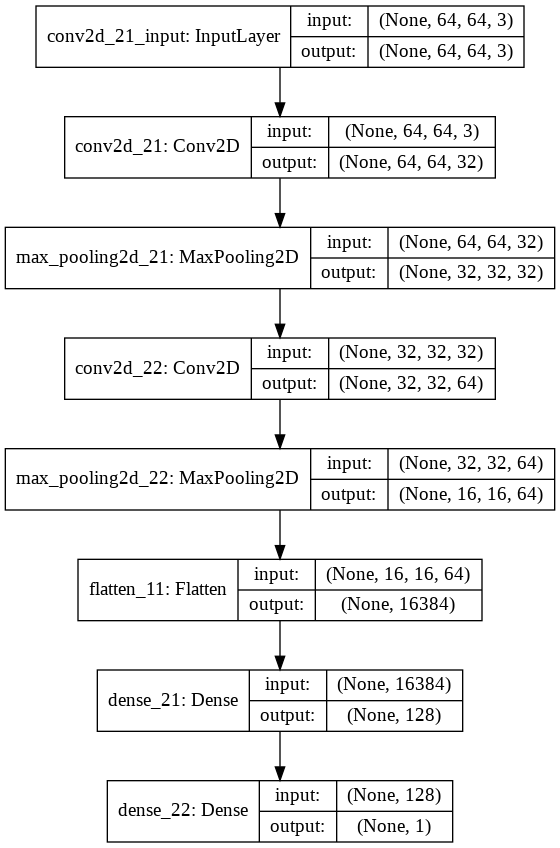

In [107]:
from keras.utils.vis_utils import plot_model
plot_model(model,show_shapes=True,show_layer_names=True)

**Prepare Clothes Image Dataset with Data Augumentation Technique**

In [108]:
# call define model function
model = define_model()
datagen = ImageDataGenerator(rescale=1.0/255.0)

# prepare iterators
train_it = datagen.flow_from_directory('/content/drive/My Drive/CNN/fk_clothes_data/augu_data_train',
class_mode='binary', batch_size=batch_size, target_size=(img_rows, img_cols),shuffle=True)

test_it = datagen.flow_from_directory('/content/drive/My Drive/CNN/fk_clothes_data/test_clothes',
class_mode='binary', batch_size=batch_size, target_size=(img_rows, img_cols),shuffle=False)


Found 1262 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


**Implement EarlyStopping & Checkpoint**

In [109]:
checkpoint = ModelCheckpoint('/content/drive/My Drive/CNN/fk_clothes_data/model_checkpoint_Adadelta.h5',
                             monitor='val_loss', 
                             verbose=1, 
                             save_best_only=True, 
                             mode='min')
#callbacks =[checkpoint] 

In [110]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
earlystop = EarlyStopping(monitor='val_loss', 
                          min_delta=0, 
                          patience=3, 
                          verbose=1, 
                          restore_best_weights=True)

#callbacks = [earlystop,checkpoint]

In [111]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.2, 
                                            min_delta=0)
callbacks = [earlystop,checkpoint,learning_rate_reduction]

**Train the Model**

In [112]:
# fit model
start_time = datetime.now()

history = model.fit_generator(train_it, 
                              steps_per_epoch=len(train_it),
                              validation_data=test_it, 
                              validation_steps=len(test_it), 
                              epochs=epochs, 
                              verbose=1,
                              callbacks=callbacks)

end_time = datetime.now()
print("execution time = "+ str(end_time-start_time))

Epoch 1/20
19/19 [==============================] - 4s 205ms/step - loss: 1.7762 - accuracy: 0.5111 - val_loss: 0.6782 - val_accuracy: 0.6000

Epoch 00001: val_loss improved from inf to 0.67819, saving model to /content/drive/My Drive/CNN/fk_clothes_data/model_checkpoint_Adadelta.h5
Epoch 2/20
19/19 [==============================] - 4s 189ms/step - loss: 0.6886 - accuracy: 0.5816 - val_loss: 0.6270 - val_accuracy: 0.7750

Epoch 00002: val_loss improved from 0.67819 to 0.62696, saving model to /content/drive/My Drive/CNN/fk_clothes_data/model_checkpoint_Adadelta.h5
Epoch 3/20
19/19 [==============================] - 4s 196ms/step - loss: 0.6434 - accuracy: 0.6284 - val_loss: 0.6455 - val_accuracy: 0.5500

Epoch 00003: val_loss did not improve from 0.62696
Epoch 4/20
19/19 [==============================] - 4s 195ms/step - loss: 0.6206 - accuracy: 0.6442 - val_loss: 0.5555 - val_accuracy: 0.7000

Epoch 00004: val_loss improved from 0.62696 to 0.55552, saving model to /content/drive/My D

In [113]:
#model.save_weights('/content/drive/My Drive/CNN/fk_clothes_data/model_ReduceLROnPlateau_SGD.h5')

In [114]:
# evaluate model
_, acc_test = model.evaluate_generator(test_it, steps=len(test_it), verbose=0)
print('> %.3f' % (acc_test * 100.0))
# learning curves
summarize_diagnostics(history)

> 90.000


In [115]:
# evaluate model
_, acc_train = model.evaluate_generator(train_it, steps=len(train_it), verbose=0)
print('> %.3f' % (acc_train * 100.0))
# learning curves
summarize_diagnostics(history)

> 94.929


Text(0.5, 1.0, 'Training and validation loss')

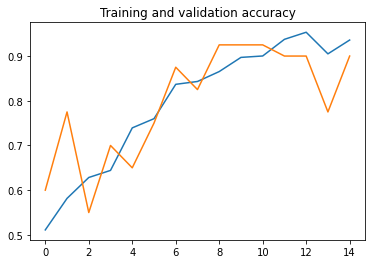

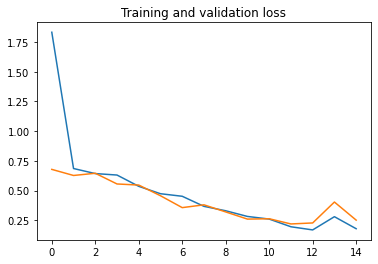

In [116]:
## Our training accuracy (in blue) & validation accuracy (in yellow)
%matplotlib inline
import matplotlib.pyplot as plt
# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

**Load Image for Validation**

In [117]:
import keras
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
image = image.load_img('/content/drive/My Drive/CNN/fk_clothes_data/validate_clothes/tr4.jpeg', target_size=(img_rows, img_cols))
input_arr = keras.preprocessing.image.img_to_array(image)
#x = np.expand_dims(input_arr, axis=0)   ## Convert single image to a batch.
input_arr = np.array([input_arr])        ## Convert single image to a batch.
#predictions = model.predict(input_arr)

**Prediction**

In [118]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
# load model
#model = load_model('my_flower_classi_model')
#predictions_classes = model.predict_classes(input_arr)

predictions_classes = model.predict_classes(input_arr)

def predict_img():
  if predictions_classes ==0:
    print("Class {} means it is a 'Jeans Image'".format(predictions_classes))
  if predictions_classes ==1:
    print("Class {} means it is a 'Trouser Image'".format(predictions_classes))

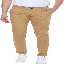

In [119]:
image

In [120]:
predict_img()

Class [[1]] means it is a 'Trouser Image'
